In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import seaborn as sb
df = pd.read_csv('winequalityN.csv')
df = df.dropna()
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [144]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [145]:
type = df['type']
new_type = list()
for i in type:
    if i == 'white':
        new_type.append(1)
    else:
        new_type.append(0)
df['type'] = new_type
quality = df['quality']
new_quality = list()
for i in quality:
    if i < 6:
        new_quality.append(0)
    else:
        new_quality.append(1)
df['quality'] = new_quality
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


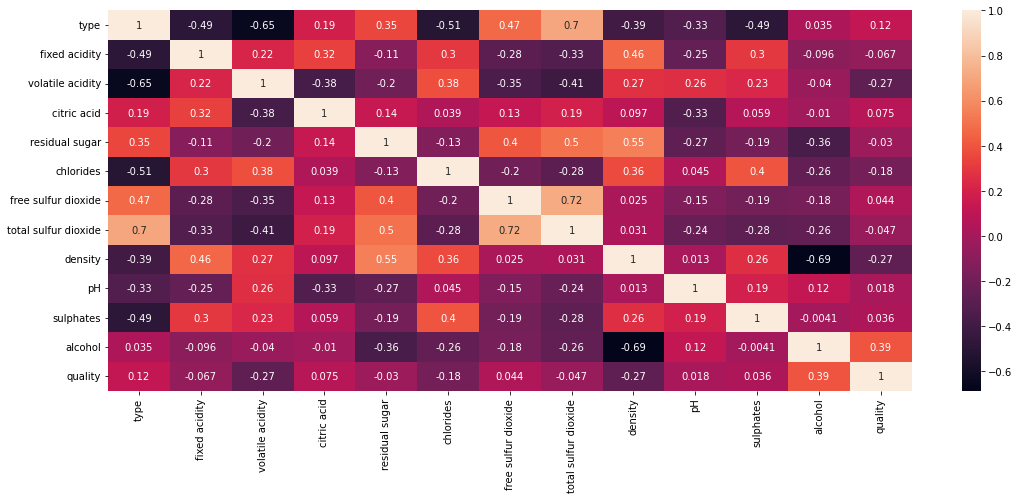

In [146]:
plt.figure(figsize=[18,7])
sb.heatmap(df.corr(),annot=True)
plt.show()

In [147]:
X = df.drop('quality',axis = 1)
X = X.drop('total sulfur dioxide', axis = 1)
X = X.drop('density', axis = 1)
Y = df['quality']
model = RandomForestClassifier()

In [148]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.1)
model.fit(xtrain,ytrain)
model.score(xtest,ytest)


0.8531684698608965